<a href="https://colab.research.google.com/github/nuot/Assessment/blob/main/Copy_of_Nuo_Tian_JPMorgan_RA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load packages
import pandas as pd
from scipy.stats import pearsonr
from sodapy import Socrata
import geopandas as gpd
import matplotlib.pyplot as plt

#extract data by calling the api
data_url='opendata.fcc.gov'    
app_token='BsoIMhuM0tZK7LM1Vterx3eB3'   #my app token
data_set = 'whue-6pnt'
client = Socrata(data_url,app_token)      
results = client.get(data_set, where="stateabbr = 'NY'", limit=5000000)
df = pd.DataFrame.from_records(results)

In [ ]:
df.head()

,logrecno,provider_id,frn,providername,dbaname,holdingcompanyname,hoconum,hocofinal,stateabbr,blockcode,techcode,consumer,maxaddown,maxadup,business
0,21413585,56800,0014734107,nysys wireless llc,NYSYS Wireless,Nysys Wireless LLC,240074,Nysys Wireless LLC,NY,360999501001059,70,1,25.0,3,1
1,21703541,56843,0003469442,Verizon New York Inc.,Verizon New York Inc.,Verizon Communications Inc.,131425,Verizon Communications Inc.,NY,360811483004015,50,1,940.0,880,1
2,28840093,58678,0027756949,Hudson Valley Wireless,Hudson Valley Wireless,Hudson Valley Wireless,190188,Hudson Valley Wireless,NY,361150940001016,70,1,100.0,10,1
3,1204691,54458,0004967055,"Windstream New York, Inc.",Windstream New York Inc.,"Windstream Holdings, Inc.",131413,"Windstream Holdings, Inc.",NY,360130305003021,12,1,50.0,25,1
4,36174355,66677,0027144112,New Visions Communications Inc,New Visions Communications,New Visions Communications,410187,New Visions Communications Inc.,NY,360670128003073,50,1,1000.0,1000,1


In [ ]:
#check for how many unique block code in the data
len(df['blockcode'].unique())

350169

In [ ]:
#group by blockcode
block_group = df.groupby(['blockcode']).size()
block_group

blockcode
360010001001000    2
360010001001001    5
360010001001002    5
360010001001003    5
360010001001004    9
                  ..
361231505004022    8
361231505004023    6
361231505004024    2
361231505004025    2
361231505004026    2
Length: 350169, dtype: int64

In [ ]:
#calculate for the mean
bl_mean = block_group.mean()
print('the mean of broadband providers per Census block is:', bl_mean)

the mean of broadband providers per Census block is: 6.356116617975892


In [ ]:
#calculate for the median
bl_median = block_group.median()
print('the median of broadband providers per Census block is:', bl_median)

the median of broadband providers per Census block is: 6.0


In [ ]:
#count for number of blockgroup have the same number as the mean
count = 0
for i in range(len(block_group)):
    if block_group[i] == bl_mean:
        count = count +1
print('There are', count, 'Census blocks have exactly the mean number of providers')

There are 0 Census blocks have exactly the mean number of providers


In [ ]:
#count for number of blockgroup have the same number as the median
count = 0
for i in range(len(block_group)):
    if block_group[i] == bl_median:
        count = count +1
print('There are', count, 'Census blocks have exactly the median number of providers')

There are 83422 Census blocks have exactly the median number of providers


In [ ]:
df['maxaddown'] = df.maxaddown.astype(float)

In [ ]:
#group by block code
block_group_speed = df[['blockcode','maxaddown']].groupby('blockcode')['maxaddown'].mean()
block_group_speed

blockcode
360010001001000     30.000000
360010001001001     17.400000
360010001001002     17.400000
360010001001003     17.400000
360010001001004    117.666667
                      ...    
361231505004022    251.500000
361231505004023    333.666667
361231505004024    517.500000
361231505004025    517.500000
361231505004026    517.500000
Name: maxaddown, Length: 350169, dtype: float64

In [ ]:
speed_num = pd.concat([block_group, block_group_speed], axis = 1)

In [ ]:
speed_num = speed_num.rename(columns={0: "providernum"})

In [ ]:
speed_num

,providernum,maxaddown
blockcode,,
360010001001000,2,30.000000
360010001001001,5,17.400000
360010001001002,5,17.400000
360010001001003,5,17.400000
360010001001004,9,117.666667
...,...,...
361231505004022,8,251.500000
361231505004023,6,333.666667
361231505004024,2,517.500000


In [ ]:
#len(speed_num['providernum'].unique())

In [ ]:
speed_num_group = speednum.groupby('providernum',as_index=False)['maxaddown'].mean()

In [ ]:
#average speed per #of providers group
speed_num_group

,providernum,maxaddown
0,1,58.418194
1,2,137.449409
2,3,115.494737
3,4,21.905775
4,5,160.715301
5,6,169.201575
6,7,186.369230
7,8,177.130506
8,9,179.375505
9,10,189.427618


Text(0, 0.5, 'Max Download Speed')

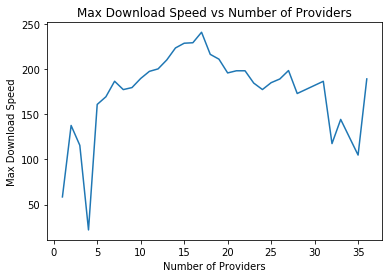

In [ ]:
plt.plot(speed_num_group['providernum'],speed_num_group['maxaddown'])
plt.title('Max Download Speed vs Number of Providers')
plt.xlabel('Number of Providers')
plt.ylabel('Max Download Speed')

In [ ]:
#calculate for correlation
corr, _ = pearsonr(speed_num_group['providernum'], speed_num_group['maxaddown'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.204


In [ ]:
gdf1 = gpd.read_file('tl_2016_36_tabblock10/tl_2016_36_tabblock10.shp')

In [ ]:
speed_num1 = speed_num.reset_index()
speed_num1 = speed_num1.rename(columns = {"blockcode":"GEOID10"})

,GEOID10,providernum,maxaddown
0,360010001001000,2,30.000000
1,360010001001001,5,17.400000
2,360010001001002,5,17.400000
3,360010001001003,5,17.400000
4,360010001001004,9,117.666667
...,...,...,...
350164,361231505004022,8,251.500000
350165,361231505004023,6,333.666667
350166,361231505004024,2,517.500000
350167,361231505004025,2,517.500000


In [ ]:
geo_df = pd.merge(gdf1[['GEOID10','geometry']],speed_num1, on='GEOID10', how='left')
geo_df

,GEOID10,geometry,providernum,maxaddown
0,360271200001028,"POLYGON ((-73.72369 41.98861, -73.72354 41.988...",7,158.857143
1,360150112005049,"POLYGON ((-76.73183 42.01556, -76.73181 42.015...",5,200.400000
2,361031464022010,"POLYGON ((-73.14913 40.74997, -73.14860 40.750...",1,35.000000
3,360594151021015,"POLYGON ((-73.54894 40.65104, -73.54879 40.651...",1,35.000000
4,360499501002196,"POLYGON ((-75.36801 43.93287, -75.36794 43.933...",4,37.250000
...,...,...,...,...
350164,360710133004076,"POLYGON ((-74.20044 41.34584, -74.20012 41.346...",7,13.571429
350165,360930320003003,"POLYGON ((-73.89865 42.81974, -73.89692 42.819...",7,156.428571
350166,360594162011022,"POLYGON ((-73.66918 40.60340, -73.66869 40.603...",6,217.000000
350167,360471144002002,"POLYGON ((-73.89651 40.67440, -73.89550 40.674...",10,141.200000


In [ ]:
geo_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 350169 entries, 0 to 350168
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   GEOID10      350169 non-null  object  
 1   geometry     350169 non-null  geometry
 2   providernum  350169 non-null  int64   
 3   maxaddown    350169 non-null  float64 
dtypes: float64(1), geometry(1), int64(1), object(1)
memory usage: 13.4+ MB


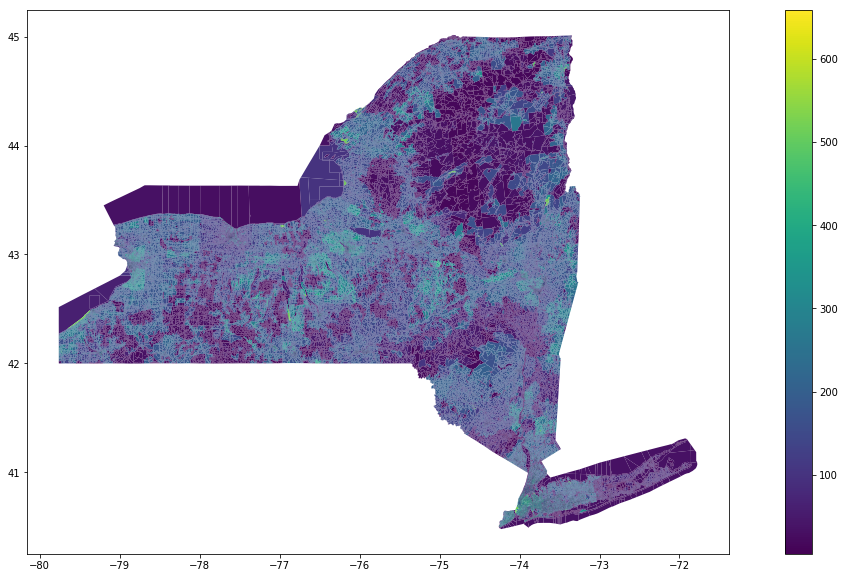

In [ ]:
geo_df.plot('maxaddown',figsize=(20, 10),legend = True)